# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

## Step 1: Reading and Understanding the Data

###   Importing Necessary Libraries

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import xgboost as xgb


### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno
pd.set_option('display.max_columns', None)

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor


from sklearn import tree
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix



#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [3]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
data = data.set_index('id')

In [5]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    circle_id                 69999 non-null  int64  
 1    loc_og_t2o_mou            69297 non-null  float64
 2    std_og_t2o_mou            69297 non-null  float64
 3    loc_ic_t2o_mou            69297 non-null  float64
 4    last_date_of_month_6      69999 non-null  object 
 5    last_date_of_month_7      69600 non-null  object 
 6    last_date_of_month_8      69266 non-null  object 
 7    arpu_6                    69999 non-null  float64
 8    arpu_7                    69999 non-null  float64
 9    arpu_8                    69999 non-null  float64
 10   onnet_mou_6               67231 non-null  float64
 11   onnet_mou_7               67312 non-null  float64
 12   onnet_mou_8               66296 non-null  float64
 13   offnet_mou_6              67231 non-null  fl

# Step 2: Create X, y and then Train test split


### Remove Constant Columns

In [6]:
constant_columns = [col for col in data.columns if len(data[col].unique()) <=2] # to see even blank values in the constant columns
                                                                                #otherwise it should be equal to 1

In [7]:
print(constant_columns)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'churn_probability']


In [8]:
data['circle_id'].unique()

array([109], dtype=int64)

In [9]:
data['loc_og_t2o_mou'].unique()

array([ 0., nan])

In [10]:
data['std_og_t2o_mou'].unique()

array([ 0., nan])

In [11]:
data['loc_ic_t2o_mou'].unique()

array([ 0., nan])

In [12]:
data['last_date_of_month_6'].unique()

array(['6/30/2014'], dtype=object)

In [13]:
data['last_date_of_month_7'].unique()

array(['7/31/2014', nan], dtype=object)

In [14]:
data['last_date_of_month_8'].unique()

array(['8/31/2014', nan], dtype=object)

In [15]:
data['std_og_t2c_mou_6'].unique()

array([ 0., nan])

In [16]:
data['std_og_t2c_mou_7'].unique()

array([ 0., nan])

In [17]:
data['std_og_t2c_mou_8'].unique()

array([ 0., nan])

In [18]:
data['std_ic_t2o_mou_6'].unique()

array([ 0., nan])

In [19]:
data['std_ic_t2o_mou_7'].unique()

array([ 0., nan])

In [20]:
data['std_ic_t2o_mou_8'].unique()

array([ 0., nan])

In [21]:
to_drop =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [22]:
X = data.drop(to_drop,1).iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 157), (69999,))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 157), (14000, 157), (55999,), (14000,))

In [24]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15446,4176.128,3287.954,4269.998,40.83,2.03,21.03,205.71,61.31,54.89,0.00,0.0,0.00,0.00,0.00,0.00,36.68,1.63,12.31,49.64,2.29,8.21,5.28,2.88,4.43,0.0,0.0,0.0,91.61,6.81,24.96,3.99,0.00,5.41,0.00,0.00,0.00,0.0,0.0,0.0,3.99,0.00,5.41,150.93,56.53,45.54,0.00,0.00,0.00,0.00,0.0,0.0,246.54,63.34,75.93,53.04,3.36,28.81,51.73,6.06,13.71,11.69,3.88,13.21,116.48,13.31,55.74,28.76,15.88,18.48,0.00,0.00,0.00,0.0,0.0,0.0,28.76,15.88,18.48,162.14,60.89,79.36,0.00,0.0,0.0,14.86,26.89,4.43,2.03,4.79,0.7,6,6,5,5150,3630,4100,2100,1580,1050,6/27/2014,7/31/2014,8/25/2014,0,1000,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,264,165.69,449.15,471.42
42512,112.714,9.882,0.000,91.26,12.75,NaN,31.36,0.00,NaN,121.16,0.0,NaN,122.63,12.75,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.0,NaN,0.00,0.00,NaN,0.00,0.00,NaN,5,5,4,132,30,0,44,30,0,6/18/2014,7/23/2014,8/28/2014,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1971,0.00,0.00,0.00
39967,167.890,167.848,193.302,0.00,0.00,0.71,0.00,0.00,2.16,0.00,0.0,7.

In [25]:
X_train.shape

(55999, 157)

### Missing Value Analysis

In [26]:
pd. set_option("display.max_rows", None)
missing_data_percent = 100*X_train.isnull().sum()/(X_train.shape[0])
missing_data_percent[missing_data_percent>0]

onnet_mou_6                  3.878641
onnet_mou_7                  3.821497
onnet_mou_8                  5.319738
offnet_mou_6                 3.878641
offnet_mou_7                 3.821497
offnet_mou_8                 5.319738
roam_ic_mou_6                3.878641
roam_ic_mou_7                3.821497
roam_ic_mou_8                5.319738
roam_og_mou_6                3.878641
roam_og_mou_7                3.821497
roam_og_mou_8                5.319738
loc_og_t2t_mou_6             3.878641
loc_og_t2t_mou_7             3.821497
loc_og_t2t_mou_8             5.319738
loc_og_t2m_mou_6             3.878641
loc_og_t2m_mou_7             3.821497
loc_og_t2m_mou_8             5.319738
loc_og_t2f_mou_6             3.878641
loc_og_t2f_mou_7             3.821497
loc_og_t2f_mou_8             5.319738
loc_og_t2c_mou_6             3.878641
loc_og_t2c_mou_7             3.821497
loc_og_t2c_mou_8             5.319738
loc_og_mou_6                 3.878641
loc_og_mou_7                 3.821497
loc_og_mou_8

In [27]:
#Columns with missing percentage greater than 40%
cols_miss_grtr_40 = list(missing_data_percent[missing_data_percent>40].index)
print(cols_miss_grtr_40)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [28]:
X_train = X_train.drop(cols_miss_grtr_40,axis=1)

In [29]:
X_train.shape

(55999, 127)

In [30]:
print(100*X_train.isnull().sum()/(X_train.shape[0]))

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.878641
onnet_mou_7            3.821497
onnet_mou_8            5.319738
offnet_mou_6           3.878641
offnet_mou_7           3.821497
offnet_mou_8           5.319738
roam_ic_mou_6          3.878641
roam_ic_mou_7          3.821497
roam_ic_mou_8          5.319738
roam_og_mou_6          3.878641
roam_og_mou_7          3.821497
roam_og_mou_8          5.319738
loc_og_t2t_mou_6       3.878641
loc_og_t2t_mou_7       3.821497
loc_og_t2t_mou_8       5.319738
loc_og_t2m_mou_6       3.878641
loc_og_t2m_mou_7       3.821497
loc_og_t2m_mou_8       5.319738
loc_og_t2f_mou_6       3.878641
loc_og_t2f_mou_7       3.821497
loc_og_t2f_mou_8       5.319738
loc_og_t2c_mou_6       3.878641
loc_og_t2c_mou_7       3.821497
loc_og_t2c_mou_8       5.319738
loc_og_mou_6           3.878641
loc_og_mou_7           3.821497
loc_og_mou_8           5.319738
std_og_t2t_mou_6       3.878641
std_og_t

In [31]:
missing_data_percent = 100*X_train.isnull().sum()/(X_train.shape[0])
impute_cols = list(missing_data_percent[missing_data_percent.gt(0)].index)

print(impute_cols)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

In [32]:
impute_cols_non_numeric = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [33]:
impute_cols_numeric = [x for x in impute_cols if x not in impute_cols_non_numeric]
print(impute_cols_numeric)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

### Impute Missing Values

In [34]:

imp = SimpleImputer(strategy='median') 
                                       
X_train[impute_cols_numeric] = imp.fit_transform(X_train[impute_cols_numeric])

'''these are continous numerical columns not discrete columns,
 we can also impute by using box plots ''' 


'these are continous numerical columns not discrete columns,\n we can also impute by using box plots '

In [35]:
imp_2 = SimpleImputer(strategy='most_frequent')
X_train[impute_cols_non_numeric] = imp_2.fit_transform(X_train[impute_cols_non_numeric])

In [36]:
#Columns with missing percentage greater than 0%
missing_data_percent = 100*X_train.isnull().sum()/(X_train.shape[0])
missing_data_percent[missing_data_percent>0]

Series([], dtype: float64)

In [37]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55999 entries, 15446 to 45925
Data columns (total 127 columns):
 #    Column               Dtype  
---   ------               -----  
 0    arpu_6               float64
 1    arpu_7               float64
 2    arpu_8               float64
 3    onnet_mou_6          float64
 4    onnet_mou_7          float64
 5    onnet_mou_8          float64
 6    offnet_mou_6         float64
 7    offnet_mou_7         float64
 8    offnet_mou_8         float64
 9    roam_ic_mou_6        float64
 10   roam_ic_mou_7        float64
 11   roam_ic_mou_8        float64
 12   roam_og_mou_6        float64
 13   roam_og_mou_7        float64
 14   roam_og_mou_8        float64
 15   loc_og_t2t_mou_6     float64
 16   loc_og_t2t_mou_7     float64
 17   loc_og_t2t_mou_8     float64
 18   loc_og_t2m_mou_6     float64
 19   loc_og_t2m_mou_7     float64
 20   loc_og_t2m_mou_8     float64
 21   loc_og_t2f_mou_6     float64
 22   loc_og_t2f_mou_7     float64
 23   loc_o

In [38]:
X_train.drop(impute_cols_non_numeric,axis=1,inplace=True)

In [39]:
X_train.shape

(55999, 124)

In [40]:
X_train.to_csv("iteration_1.csv",index=False)

# Step 3: Exploratory Data Analysis & Preprocessing

### Outliers treatment

In [41]:

clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X_out = X_train[impute_cols_numeric].values
out_pred = clf.fit_predict(X_out)

In [42]:
print(out_pred)

[-1 -1  1 ...  1  1  1]


In [43]:
print(pd.Series(out_pred).value_counts())

 1    49431
-1     6568
dtype: int64


In [44]:
X_train_out_removed = X_train.loc[out_pred==1,:]
print(X_train_out_removed.shape)

(49431, 124)


In [45]:
y_train=y_train.loc[out_pred==1]

### Feature engineering

In [46]:
superscript =["arpu_","onnet_mou_","offnet_mou_","roam_ic_mou_","roam_og_mou_","loc_og_t2t_mou_","loc_og_t2m_mou_","loc_og_t2f_mou_","loc_og_t2c_mou_",
"loc_og_mou_","std_og_t2t_mou_","std_og_t2m_mou_","std_og_t2f_mou_","std_og_mou_","isd_og_mou_","spl_og_mou_","og_others_","total_og_mou_","loc_ic_t2t_mou_",
"loc_ic_t2m_mou_","loc_ic_t2f_mou_","loc_ic_mou_","std_ic_t2t_mou_","std_ic_t2m_mou_","std_ic_t2f_mou_","std_ic_mou_","total_ic_mou_",
"spl_ic_mou_","isd_ic_mou_","ic_others_","total_rech_num_","total_rech_amt_","vol_2g_mb_",
"vol_3g_mb_","monthly_2g_","sachet_2g_","monthly_3g_","sachet_3g_"]

list_of_superscript_cols =[]
for i in range(len(superscript)):
    cols = list(X_train_out_removed.columns[X_train_out_removed.columns.str.startswith(superscript[i])])
    list_of_superscript_cols.append(cols)
    
print(list_of_superscript_cols )

for i in range(len(superscript)):
    X_train_out_removed[superscript[i]+"sum"]=X_train_out_removed[list_of_superscript_cols[i]].sum(axis=1)
print(X_train_out_removed.shape)
    

[['arpu_6', 'arpu_7', 'arpu_8'], ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'], ['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'], ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'], ['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'], ['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'], ['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8'], ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'], ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8'], ['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'], ['std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8'], ['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'], ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8'], ['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'], ['og_others_6', 'og_others_7', 'og_others_8'], ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'], ['loc_ic_t2t_mou_6', 'loc_i

In [47]:
X_train_out_removed['vbc_3g_sum'] = X_train_out_removed[['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']].sum(axis=1)

In [48]:
print(X_train_out_removed.shape)

(49431, 163)


In [49]:
imp_sum_cols =  list(X_train_out_removed.columns[X_train_out_removed.columns.str.endswith("_sum")])
print(imp_sum_cols)

['arpu_sum', 'onnet_mou_sum', 'offnet_mou_sum', 'roam_ic_mou_sum', 'roam_og_mou_sum', 'loc_og_t2t_mou_sum', 'loc_og_t2m_mou_sum', 'loc_og_t2f_mou_sum', 'loc_og_t2c_mou_sum', 'loc_og_mou_sum', 'std_og_t2t_mou_sum', 'std_og_t2m_mou_sum', 'std_og_t2f_mou_sum', 'std_og_mou_sum', 'isd_og_mou_sum', 'spl_og_mou_sum', 'og_others_sum', 'total_og_mou_sum', 'loc_ic_t2t_mou_sum', 'loc_ic_t2m_mou_sum', 'loc_ic_t2f_mou_sum', 'loc_ic_mou_sum', 'std_ic_t2t_mou_sum', 'std_ic_t2m_mou_sum', 'std_ic_t2f_mou_sum', 'std_ic_mou_sum', 'total_ic_mou_sum', 'spl_ic_mou_sum', 'isd_ic_mou_sum', 'ic_others_sum', 'total_rech_num_sum', 'total_rech_amt_sum', 'vol_2g_mb_sum', 'vol_3g_mb_sum', 'monthly_2g_sum', 'sachet_2g_sum', 'monthly_3g_sum', 'sachet_3g_sum', 'vbc_3g_sum']


### Data Visualization

In [50]:
eda_data=X_train_out_removed.copy()

eda_cols = list(eda_data.select_dtypes(include='number').columns)
eda_data['target'] = y_train.values

eda_data_1 = eda_data[eda_data['target']==0]
eda_data_0 = eda_data[eda_data['target']==1]

In [51]:

# plt.figure(figsize=(22,100))
# for i in (enumerate(eda_cols)): ## i is tuple which has key and column name pairs
#     plt.subplot(len(eda_cols)//3+3,3,i[0]+1)
#     sns.distplot(eda_data_1[i[1]].dropna(), color="r", hist=False, kde_kws={"lw": 3},label='Churn=1')
#     sns.distplot(eda_data_0[i[1]].dropna(), color="green", hist=False, kde_kws={"lw": 3},label='Churn=0')
# plt.legend()
# plt.show()   

In [52]:
# 1,2,1000, 10002
# 1,2,1,  4

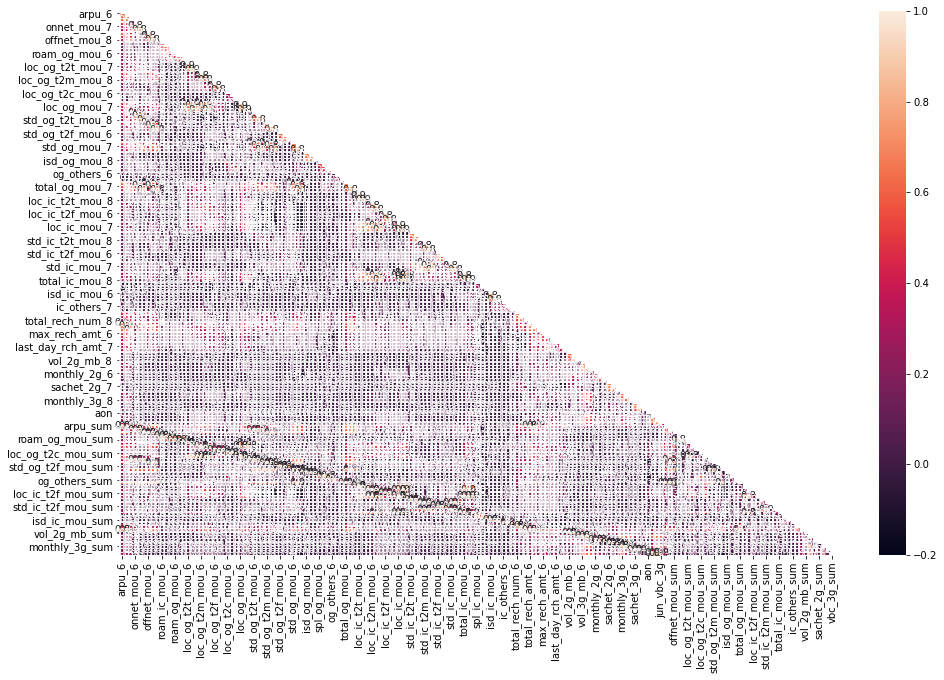

In [53]:
X_train_out_removed.corr()
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(X_train_out_removed.corr(), dtype=np.bool))
sns.heatmap(round(X_train_out_removed.corr(), 1), annot=True,mask=mask)
plt.show()

In [54]:
import numpy as np

# Create correlation matrix
corr_matrix = X_train_out_removed.corr().abs() #creates 160*160 matrix by coverting -ve correlations to +ve values
#print(corr_matrix)
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['total_ic_mou_6', 'loc_og_t2t_mou_sum', 'loc_og_t2m_mou_sum', 'loc_og_mou_sum', 'loc_ic_t2t_mou_sum', 'loc_ic_mou_sum', 'total_ic_mou_sum', 'total_rech_amt_sum']


In [55]:
high_corrs_to_drop =['loc_og_t2t_mou_sum', 'loc_og_t2m_mou_sum', 'loc_og_mou_sum', 'loc_ic_t2t_mou_sum', 'loc_ic_mou_sum', 'total_ic_mou_sum', 'total_rech_amt_sum']
# we need to drop only sum columns from top correlations as these are the variables which we created on top of existing variables
# that's why we can see that "*_7" variables have high correlations with sum variables

In [56]:
X_train_out_removed.drop(high_corrs_to_drop, axis=1, inplace=True)

In [57]:
X_train_out_removed.shape

(49431, 156)

In [58]:
X_train_out_removed.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39967,167.890,167.848,193.302,0.00,0.00,0.71,0.00,0.00,2.16,0.0,0.0,7.98,0.0,0.0,2.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,26.49,62.71,28.29,3.94,3.93,0.00,5.29,3.78,18.04,35.74,70.43,46.34,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,35.91,70.43,46.34,0.16,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6,5,3,198,198,248,198,198,198,0,0,50,149.38,34.68,12.65,643.89,397.92,589.94,1,1,1,0,0,0,0,0,0,0,0,0,250,21.13,154.12,681.55,529.040,0.71,2.16,7.98,2.88,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,7.87,27.11,0.00,0.00,0.0,0.00,0.16,0.00,0.00,14,196.71,1631.75,3,0,0,0,856.80
54093,104.107,151.487,133.804,18.51,29.43,35.68,82.36,108.81,78.76,0.0,0.0,0.00,0.0,0.0,0.00,0.43,5.81,5.28,82.36,108.81,59.19,0.00,0.00,19.49,0.00,0.00,0.0,82.79,114.63,83.98,18.08,23.61,30.39,0.00,0.00,0.00,0.0,0.0,0.0,18.08,23.61,30.39,0.0,0.0,0.0,0.00,0.00,0.06,0.00,0.0,0.0,100.88,138.24,114.44,7.39,81.91,17.38,18.91,105.81,109.69,0.00,0.00,0.00,26.31,187.73,127.08,0.00,14.58,5.83,0.00,0.00,0.00,0.0,0.0,0.0,0.00,14.58,5.83,26.31,202.31,132.91,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,4,4,130,150,160,50,50,50,30,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,649,0.00,0.00,0.00,389.398,83.62,269.93,0.00,0.00,19.49,0.00,72.08,0.00,0.0,72.08,0.0,0.06,0.00,353.56,234.41,0.00,20.41,0.00,0.0,20.41,0.00,0.00,0.00,11,0.00,0.00,0,0,0,0,0.00
31379,490.799,840.898,849.796,67.68,232.48,351.78,

### Feature Scaling

In [59]:

pt = PowerTransformer(method='yeo-johnson', standardize=True,) 


In [60]:
scale_num_cols= list(X_train_out_removed.columns)
X_train_out_removed[scale_num_cols] = pt.fit_transform(X_train_out_removed[scale_num_cols])

In [61]:
X_train_out_removed.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39967,-0.286266,-0.316916,-0.165396,-1.780473,-1.755444,-1.493375,-2.199335,-2.179429,-1.756093,-0.462259,-0.389966,2.687492,-0.465426,-0.391461,2.590069,-1.537724,-1.537425,-1.541982,-1.811031,-1.823902,-1.819964,-0.751114,-0.759816,-0.744878,-0.461801,-0.480253,-0.492962,-1.894310,-1.907781,-1.895297,-0.816234,-0.816932,-0.797820,-1.081236,-1.068754,-1.061883,-0.355324,-0.342862,-0.341059,-1.190402,-1.176275,-1.173239,-0.204951,-0.197002,-0.187241,-0.754551,-0.812378,-0.824309,-0.447204,-0.05517,-0.064369,-1.867834,-1.881271,-1.808781,0.376052,0.928399,0.411691,-1.387623,-1.426636,-2.058429,0.779851,0.584937,1.328361,-0.605506,-0.188293,-0.482065,-0.748682,-0.755697,-0.744473,-1.093646,-1.087060,-1.093445,-0.491028,-0.489883,-0.492298,-1.277639,-1.270173,-1.283368,-0.680694,-0.312164,-0.536917,1.925790,-0.344017,-0.364632,-0.390242,-0.408888,-0.399834,-0.501067,-0.466238,-0.495094,0.056959,-0.209179,-0.588713,-0.076662,-0.038325,0.155749,1.063673,1.056060,0.994100,-1.431544,-1.300095,0.505796,2.072052,2.018551,1.892550,2.512106,2.432710,2.392056,3.636022,3.545769,3.608185,-0.377823,-0.384118,-0.398990,-0.240746,-0.23677,-0.246293,-0.205986,-0.203249,-0.205612,-1.528958,2.285899,2.406178,2.494848,-0.120069,-2.133844,-2.735271,1.605229,1.072144,-0.986137,-0.744819,-1.006050,-1.341963,-0.495321,-1.447417,-0.297079,-1.139534,-0.452702,-2.480371,-1.943081,0.876312,-1.004057,-1.444330,-0.688915,-1.684765,1.096908,-0.545484,-0.678372,-0.345896,1.643057,2.010823,2.674397,-0.521575,-0.3209,-0.299260,2.053295
54093,-0.614088,-0.384

In [62]:
X_train_final=X_train_out_removed.copy()

In [63]:
X_train_final.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39967,-0.286266,-0.316916,-0.165396,-1.780473,-1.755444,-1.493375,-2.199335,-2.179429,-1.756093,-0.462259,-0.389966,2.687492,-0.465426,-0.391461,2.590069,-1.537724,-1.537425,-1.541982,-1.811031,-1.823902,-1.819964,-0.751114,-0.759816,-0.744878,-0.461801,-0.480253,-0.492962,-1.894310,-1.907781,-1.895297,-0.816234,-0.816932,-0.797820,-1.081236,-1.068754,-1.061883,-0.355324,-0.342862,-0.341059,-1.190402,-1.176275,-1.173239,-0.204951,-0.197002,-0.187241,-0.754551,-0.812378,-0.824309,-0.447204,-0.05517,-0.064369,-1.867834,-1.881271,-1.808781,0.376052,0.928399,0.411691,-1.387623,-1.426636,-2.058429,0.779851,0.584937,1.328361,-0.605506,-0.188293,-0.482065,-0.748682,-0.755697,-0.744473,-1.093646,-1.087060,-1.093445,-0.491028,-0.489883,-0.492298,-1.277639,-1.270173,-1.283368,-0.680694,-0.312164,-0.536917,1.925790,-0.344017,-0.364632,-0.390242,-0.408888,-0.399834,-0.501067,-0.466238,-0.495094,0.056959,-0.209179,-0.588713,-0.076662,-0.038325,0.155749,1.063673,1.056060,0.994100,-1.431544,-1.300095,0.505796,2.072052,2.018551,1.892550,2.512106,2.432710,2.392056,3.636022,3.545769,3.608185,-0.377823,-0.384118,-0.398990,-0.240746,-0.23677,-0.246293,-0.205986,-0.203249,-0.205612,-1.528958,2.285899,2.406178,2.494848,-0.120069,-2.133844,-2.735271,1.605229,1.072144,-0.986137,-0.744819,-1.006050,-1.341963,-0.495321,-1.447417,-0.297079,-1.139534,-0.452702,-2.480371,-1.943081,0.876312,-1.004057,-1.444330,-0.688915,-1.684765,1.096908,-0.545484,-0.678372,-0.345896,1.643057,2.010823,2.674397,-0.521575,-0.3209,-0.299260,2.053295
54093,-0.614088,-0.384

In [64]:
y_train.head()

id
39967    0
54093    0
31379    0
50297    0
14563    0
Name: churn_probability, dtype: int64

### Class imbalance

In [65]:
y_train_rows = y_train.shape[0]
y_train_0 = y_train[y_train==0].shape[0]
y_train_1 = y_train[y_train==1].shape[0]
print("Class 0 proportion : ", round((y_train_0*100/y_train_rows),2)," %")
print("Class 1 proportion : ", round((y_train_1*100/y_train_rows),2)," %")

Class 0 proportion :  90.79  %
Class 1 proportion :  9.21  %


In [66]:
y_test_rows = y_test.shape[0]
y_test_0 = y_test[y_test==0].shape[0]
y_test_1 = y_test[y_test==1].shape[0]
print("Class 0 proportion : ", round((y_test_0*100/y_test_rows),2)," %")
print("Class 1 proportion : ", round((y_test_1*100/y_test_rows),2)," %")

Class 0 proportion :  89.81  %
Class 1 proportion :  10.19  %


# Step 7: Building models with PC's

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [67]:
pca = PCA(random_state=42)

In [68]:
pca.fit(X_train_final)

PCA(random_state=42)

In [69]:
pca.components_

array([[ 1.26484037e-01,  1.34126003e-01,  1.28723119e-01, ...,
         2.66948208e-02,  9.30722872e-03,  2.19641426e-02],
       [-3.57922655e-03, -1.34722769e-02, -7.96249664e-03, ...,
         5.28333485e-02,  3.70112097e-02,  9.12982982e-02],
       [ 6.29526174e-02,  7.49428344e-02,  7.20027824e-02, ...,
         1.43678330e-01,  1.38304142e-01,  2.09513111e-01],
       ...,
       [-2.12287330e-05,  5.64380202e-04, -1.22007580e-04, ...,
         3.71102315e-04, -1.00415969e-03,  2.36937495e-03],
       [-1.53990905e-03,  4.77368141e-04,  6.74504650e-05, ...,
         4.37499949e-04, -1.64617230e-04,  6.21727631e-04],
       [-5.21612611e-04,  9.29353851e-04, -1.20702705e-03, ...,
        -1.28310645e-03,  1.88410668e-04,  3.11645145e-04]])

In [70]:
pca.explained_variance_ratio_

array([1.71894205e-01, 1.14198697e-01, 7.29015233e-02, 4.22964540e-02,
       3.47018853e-02, 3.30228943e-02, 2.46036249e-02, 2.36127717e-02,
       2.15643480e-02, 2.05659883e-02, 1.97474931e-02, 1.84781853e-02,
       1.84129997e-02, 1.52791112e-02, 1.46637387e-02, 1.38454318e-02,
       1.15396076e-02, 1.12512015e-02, 1.08985570e-02, 1.04137910e-02,
       1.02488162e-02, 9.98532744e-03, 9.35213976e-03, 8.60232957e-03,
       8.42695855e-03, 7.81532662e-03, 7.74279807e-03, 7.47117005e-03,
       7.13724583e-03, 6.38835214e-03, 6.22401794e-03, 6.08469129e-03,
       5.77828172e-03, 5.44268328e-03, 5.29875668e-03, 5.02099329e-03,
       4.91089474e-03, 4.81643406e-03, 4.79856677e-03, 4.70416669e-03,
       4.55595017e-03, 4.47081515e-03, 4.37770098e-03, 4.26218418e-03,
       4.06526668e-03, 3.94268016e-03, 3.90530625e-03, 3.85752765e-03,
       3.77155479e-03, 3.62909324e-03, 3.53696985e-03, 3.51488790e-03,
       3.42373104e-03, 3.28716907e-03, 3.23419346e-03, 3.17945266e-03,
      

In [71]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [72]:
var_cumu

array([0.17189421, 0.2860929 , 0.35899443, 0.40129088, 0.43599276,
       0.46901566, 0.49361928, 0.51723206, 0.5387964 , 0.55936239,
       0.57910989, 0.59758807, 0.61600107, 0.63128018, 0.64594392,
       0.65978935, 0.67132896, 0.68258016, 0.69347872, 0.70389251,
       0.71414133, 0.72412665, 0.73347879, 0.74208112, 0.75050808,
       0.75832341, 0.76606621, 0.77353738, 0.78067462, 0.78706297,
       0.79328699, 0.79937168, 0.80514996, 0.81059265, 0.8158914 ,
       0.8209124 , 0.82582329, 0.83063973, 0.83543829, 0.84014246,
       0.84469841, 0.84916923, 0.85354693, 0.85780911, 0.86187438,
       0.86581706, 0.86972236, 0.87357989, 0.87735145, 0.88098054,
       0.88451751, 0.8880324 , 0.89145613, 0.8947433 , 0.89797749,
       0.90115694, 0.90423731, 0.90727491, 0.91024061, 0.91313352,
       0.91596983, 0.91878553, 0.92146829, 0.92412341, 0.92673783,
       0.92921069, 0.93166622, 0.93406089, 0.93637656, 0.93857   ,
       0.94070409, 0.94280672, 0.94477239, 0.94671009, 0.94859

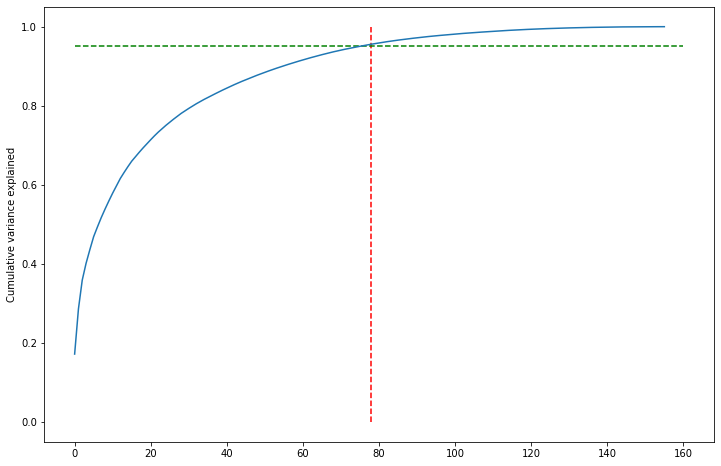

In [73]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=78, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [74]:
pca_final = IncrementalPCA(n_components=78)

In [75]:
df_train_pca = pca_final.fit_transform(X_train_final)

In [76]:
df_train_pca.shape

(49431, 78)

In [77]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [78]:
corrmat.shape

(78, 78)

<AxesSubplot:>

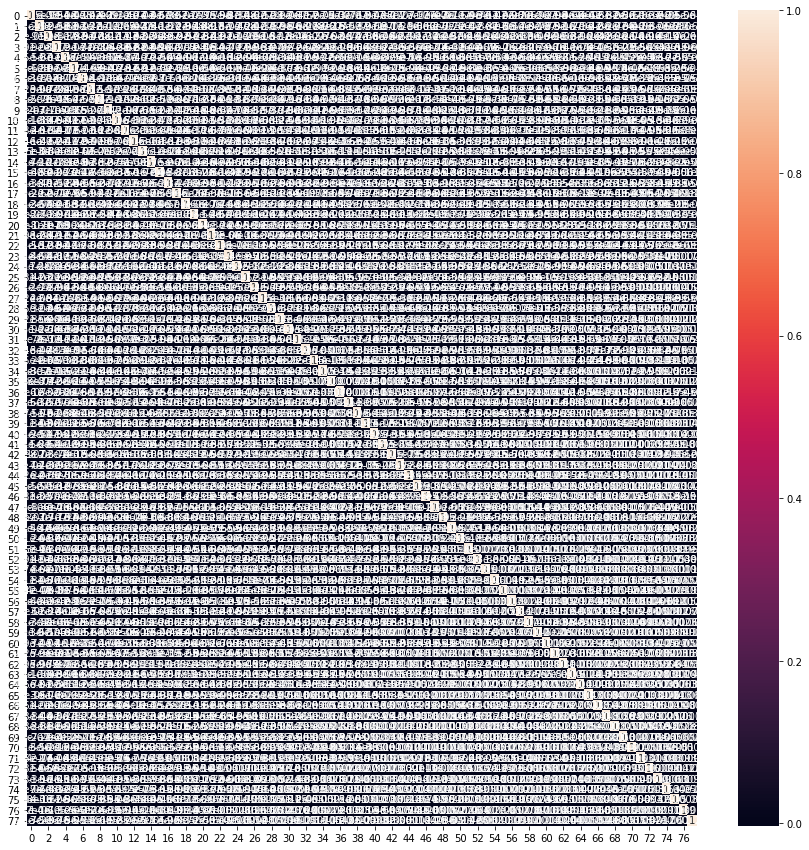

In [79]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

<AxesSubplot:>

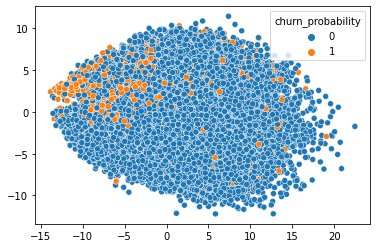

In [80]:
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1], hue=y_train)

In [81]:
X_test = pd.read_csv("test_final_after_scaling.csv",index_col=0)

In [82]:
X_test = X_test[X_train_final.columns]
X_test.shape

(14000, 156)

In [83]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(14000, 78)

In [84]:
df_test_pca[:5,:]

array([[ 1.13642409e+01,  4.78549639e+00,  2.65267545e+00,
         4.46129183e-03,  9.04958546e-02,  1.77213942e+00,
         2.07461179e+00, -1.70176798e+00, -3.63824569e+00,
        -1.87909832e+00, -1.02645679e+00,  2.38763319e+00,
         7.38215174e-01,  2.92744622e-01,  1.38675449e+00,
        -7.64272033e-01,  3.57103753e+00,  3.13499531e-01,
         2.48335810e+00,  4.18487341e-02, -4.47528431e-01,
         9.78669242e-01,  1.74389935e+00,  1.48068103e+00,
         5.35133120e-01, -1.48135188e+00,  1.74979265e+00,
        -6.82228290e-01, -2.18914479e+00,  4.24458842e-03,
        -1.15559251e+00, -2.00205186e+00,  1.37115315e+00,
        -2.10360352e+00,  5.53394768e-02,  5.01215707e-01,
        -1.21047097e+00, -1.27864606e+00, -2.38989226e+00,
        -1.92565448e+00, -6.57906393e-01, -1.27434964e+00,
         2.01301121e-01,  2.40489287e+00, -9.42378623e-01,
         2.20446938e+00, -1.36975469e+00,  2.60467971e+00,
        -4.93565472e-01, -1.22191846e+00,  1.36834500e+0

# Nearest Neighbors on PCA

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
param_grid = {'n_neighbors': [5, 10,20, 50, 100, 150],
             'weights' : ['uniform', 'distance']}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

knear = GridSearchCV(KNeighborsClassifier(), return_train_score=True,verbose=1,n_jobs=-1,
                  param_grid=param_grid, scoring=scoring, cv=5, refit='Accuracy')

knear.fit(df_train_pca, y_train)
results = knear.cv_results_


print("best params: " + str(knear.best_estimator_))
print("best params: " + str(knear.best_params_))
print('best score:', knear.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
best params: KNeighborsClassifier()
best params: {'n_neighbors': 5, 'weights': 'uniform'}
best score: nan


In [87]:
knear_best = knear.best_estimator_
knear_best

KNeighborsClassifier()

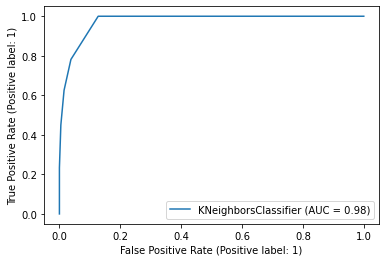

In [88]:
plot_roc_curve(knear_best, df_train_pca, y_train)
plt.show()

In [89]:
# Creating a new dataset and saving predicted values in it
pred_probs_train_knear = knear_best.predict_proba(df_train_pca)## will get probs of class o and class 1 as twocolumns
y_train_pred_knear = pred_probs_train_knear[:,1]
y_train_pred_final_knear=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred_knear,'ID':y_train.index})
y_train_pred_final_knear.head()   # viewing first 5 rows


,Churn,Churn_Prob,ID
0,0,0.0,39967
1,0,0.0,54093
2,0,0.0,31379
3,0,0.0,50297
4,0,0.0,14563


In [90]:
# creating 10 points out of which one we will choose for our cutoff point

numb=[float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05

for i in numb:
    y_train_pred_final_knear[i]=y_train_pred_final_knear.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_knear.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.0,39967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,54093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,31379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,50297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,14563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


In [92]:
num = [float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05
for i in num:
    cm1 = metrics.confusion_matrix( y_train_pred_final_knear.Churn,  y_train_pred_final_knear[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.884344  1.000000  0.872605
0.05  0.05  0.884344  1.000000  0.872605
0.10  0.10  0.884344  1.000000  0.872605
0.15  0.15  0.884344  1.000000  0.872605
0.20  0.20  0.945560  0.781559  0.962207
0.25  0.25  0.945560  0.781559  0.962207
0.30  0.30  0.945560  0.781559  0.962207
0.35  0.35  0.945560  0.781559  0.962207
0.40  0.40  0.951630  0.625467  0.984736
0.45  0.45  0.951630  0.625467  0.984736
0.50  0.50  0.951630  0.625467  0.984736
0.55  0.55  0.951630  0.625467  0.984736
0.60  0.60  0.945034  0.449835  0.995298
0.65  0.65  0.945034  0.449835  0.995298
0.70  0.70  0.945034  0.449835  0.995298
0.75  0.75  0.945034  0.449835  0.995298
0.80  0.80  0.929356  0.233370  1.000000
0.85  0.85  0.929356  0.233370  1.000000
0.90  0.90  0.929356  0.233370  1.000000
0.95  0.95  0.929356  0.233370  1.000000


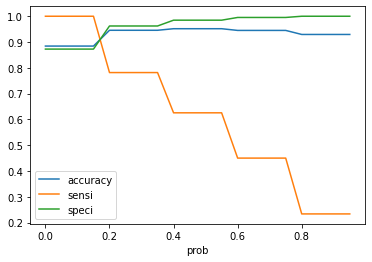

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [94]:
# Predicting the outcomes with probability cutoff as 0.10 by creating new columns in the final dataset

y_train_pred_final_knear['final_predicted'] = y_train_pred_final_knear.Churn_Prob.map(lambda x:1 if x >0.2 else 0 )  # Predicted value 

y_train_pred_final_knear.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.0,39967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,54093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,31379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,50297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,14563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final_knear.Churn, y_train_pred_final_knear.final_predicted)


0.9455604782423985

In [96]:
y_test_pred_knear = knear_best.predict_proba(df_test_pca)[:,1]

In [97]:
knear_test_results =pd.DataFrame()

In [98]:
knear_test_results["id"] = y_test.index
knear_test_results["Churn_prob"] = y_test_pred_knear
knear_test_results["Churn"] = y_test.values
knear_test_results['Churn_predicted'] = knear_test_results.Churn_prob.map(lambda x:1 if x >0.2 else 0 )  # Predicted value 


In [99]:
knear_test_results.head()

,id,Churn_prob,Churn,Churn_predicted
0,21669,0.2,0,0
1,67359,0.2,0,0
2,67606,0.0,0,0
3,52029,0.6,1,1
4,8349,0.0,0,0


In [100]:
# Let's check the overall accuracy.
metrics.accuracy_score(knear_test_results.Churn, knear_test_results.Churn_predicted)


0.9207142857142857

# knearest neighbor submission

In [101]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [102]:
unseen[impute_cols_numeric] = imp.transform(unseen[impute_cols_numeric]) ###missing values imputation

In [103]:

for i in range(len(superscript)):
    unseen[superscript[i]+"sum"]=unseen[list_of_superscript_cols[i]].sum(axis=1)
print(unseen.shape)

(30000, 209)


In [104]:
unseen['vbc_3g_sum'] = unseen[['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']].sum(axis=1)

In [105]:
scale_num_cols= list(X_train_out_removed.columns) # these columns are x_train_final dataset columns
unseen[scale_num_cols] = pt.transform(unseen[scale_num_cols])

In [106]:
unseen.set_index("id",inplace=True)

In [107]:
unseen = unseen[X_train_final.columns]
unseen.shape

(30000, 156)

In [108]:
df_unseen_pca = pca_final.transform(unseen)
df_unseen_pca.shape

(30000, 78)

In [109]:
classes = pd.DataFrame()
classes['probs'] = knear_best.predict_proba(df_unseen_pca)[:,1]
classes['class'] =  classes['probs'].map(lambda x:1 if x > 0.2 else 0 )

In [110]:
classes.head()

,probs,class
0,0.0,0
1,0.0,0
2,0.8,1
3,0.0,0
4,0.0,0


In [112]:
knear_unseen_pred = pd.DataFrame()
knear_unseen_pred['id'] = unseen.index
knear_unseen_pred['churn_probability'] = classes['class'].values

In [113]:
knear_unseen_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [114]:
knear_unseen_pred.to_csv('knear_submission.csv', index=False)